In [2]:
import pandas as pd

df = pd.read_csv('../data/titanic.csv')

In [3]:
dic = {
    'name': ['小明', '小�', '小燕'],
    'age': [18, 20, 19],
    'gender': ['男', '奇', '奇'],
    'height': [1.75, 1.80, 1.85]
}

df1 = pd.DataFrame(dic, index=['a', 'b', 'c'])
df1

,name,age,gender,height
a,小明,18,男,1.75
b,小�,20,奇,1.80
c,小燕,19,奇,1.85


In [5]:
df1.reindex(['c', 'b', 'a'])

,name,age,gender,height
c,小燕,19,奇,1.85
b,小�,20,奇,1.80
a,小明,18,男,1.75


In [15]:
for i in df1.iterrows():
    print(i)
# iteritems for columns

('a', name        小明
age         18
gender       男
height    1.75
Name: a, dtype: object)
('b', name       小�
age        20
gender      奇
height    1.8
Name: b, dtype: object)
('c', name        小燕
age         19
gender       奇
height    1.85
Name: c, dtype: object)


In [28]:
df1.applymap( lambda x: x+1
    if (type(x) == int) | (type(x) == float)
    else x + '-'
)

,name,age,gender,height
a,小明-,19,男-,2.75
b,小�-,21,奇-,2.80
c,小燕-,20,奇-,2.85


In [22]:
df1.sort_index(ascending=False)

,name,age,gender,height
c,小燕,19,奇,1.85
b,小�,20,奇,1.80
a,小明,18,男,1.75


In [9]:
df[1:2][['Name']] # Name not fully displayed

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


In [35]:
pd.set_option('display.max_colwidth', 70)
# Set max characters to be displayed = 70

In [28]:
df[1:2][['Name']]

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"


In [38]:
df["words_in_name"] = df["Name"].apply(lambda x: len(x.split()))

df[['Name', 'words_in_name']]

,Name,words_in_name
0,"Braund, Mr. Owen Harris",4
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",7
2,"Heikkinen, Miss. Laina",3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",7
4,"Allen, Mr. William Henry",4
...,...,...
886,"Montvila, Rev. Juozas",3
887,"Graham, Miss. Margaret Edith",4
888,"Johnston, Miss. Catherine Helen ""Carrie""",5
889,"Behr, Mr. Karl Howell",4


### Pandas Window functions
> Rolling window

In [39]:
df2 = pd.DataFrame(
    {
        'nums': [1, 2, 3, 4, 5],
        'letters': ['a', 'b', 'c', 'd', 'e']
    }
)

df2

,nums,letters
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [42]:
df2[['nums']].rolling(window=1).mean()

,nums
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [45]:
df2.drop(['letters'], axis=1, inplace=True)

In [46]:
df2.rolling(window=1).mean()

,nums
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [47]:
df2.rolling(window=2).mean()
# Average of the last two values

,nums
0,NaN
1,1.5
2,2.5
3,3.5
4,4.5


In [48]:
df2.rolling(window=3).mean()
# Average of the last three values

,nums
0,NaN
1,NaN
2,2.0
3,3.0
4,4.0


In [49]:
df2.rolling(window=4).sum()
# Sum of the last four values

,nums
0,NaN
1,NaN
2,NaN
3,10.0
4,14.0


In [50]:
df2.cumsum()

,nums
0,1
1,3
2,6
3,10
4,15


In [64]:
df_dates = pd.DataFrame({
    "date": [
        "2020-01-01",
        "2023-03-05",
        "2020-01-03"
    ]
})

In [65]:
df_dates.dtypes

date    object
dtype: object

In [66]:
df_dates['updated_date'] = pd.to_datetime(df_dates['date'])
df_dates

,date,updated_date
0,2020-01-01,2020-01-01
1,2023-03-05,2023-03-05
2,2020-01-03,2020-01-03


In [67]:
df_dates.dtypes

date                    object
updated_date    datetime64[ns]
dtype: object

In [68]:
df_dates['year'] = df_dates['updated_date'].dt.year
df_dates['month'] = df_dates['updated_date'].dt.month
df_dates['day'] = df_dates['updated_date'].dt.day
df_dates['weekday'] = df_dates['updated_date'].dt.day_name()

df_dates

,date,updated_date,year,month,day,weekday
0,2020-01-01,2020-01-01,2020,1,1,Wednesday
1,2023-03-05,2023-03-05,2023,3,5,Sunday
2,2020-01-03,2020-01-03,2020,1,3,Friday


Time delta

In [75]:
pd.Timedelta(hours=37.655)

Timedelta('1 days 13:39:18')

In [81]:
pd.Timedelta(37860000000000)

Timedelta('0 days 10:31:00')

In [87]:
duration = pd.Timedelta(days=4, minutes=77)
date = pd.to_datetime('22/04/2023', dayfirst=True)

date + duration

Timestamp('2023-04-26 01:17:00')

Categorical

In [93]:
users = ['mary', 'jane', 'smith', 'joseph', 'smith', 'joseph']

category = pd.Categorical(users)
category

['mary', 'jane', 'smith', 'joseph', 'smith', 'joseph']
Categories (4, object): ['jane', 'joseph', 'mary', 'smith']

In [94]:
category.value_counts()

jane      1
joseph    2
mary      1
smith     2
Name: count, dtype: int64

Visualization

<Axes: >

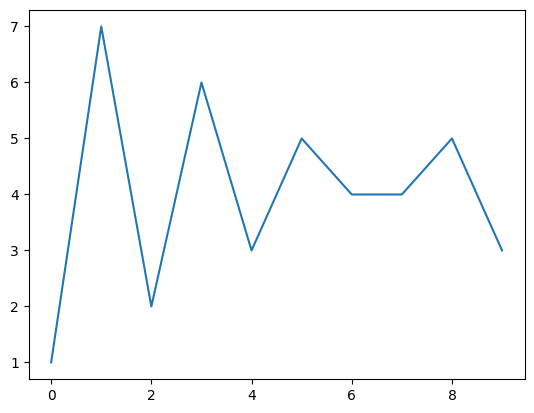

In [105]:
pd.Series([1, 7, 2, 6, 3, 5, 4, 4, 5, 3]).plot()